## Fungsi Algoritma Trapesium

In [14]:
def trapesium(fx,a,b,n):
    
    delta_X = (b - a)/(n+1) # Hasil h

    arangeplusforlooping = [a]
    g = a
    for i in range(1,n+1):
        g += delta_X
        arangeplusforlooping.append(g)

    fx_2kalitrapezoidal = []
    for i in range(1,n+1):
        trapezoidal2kali = 2 * fx(arangeplusforlooping[i])
        fx_2kalitrapezoidal.append(trapezoidal2kali)
    
    #Hasil operasi Dengan metode Trapesium
    Trapezoidal = (delta_X/2) * (fx(a) + sum(fx_2kalitrapezoidal) + fx(b))
    return Trapezoidal

## Fungsi Algoritma Simpson 1/3

In [15]:
def simpson_satupertiga(fx,a,b,n):
    
    delta_X = (b - a)/(n+1) # Hasil h 

    arangeplusforlooping = [a] 
    g = a
    for i in range(1,n+1):
        g += delta_X
        arangeplusforlooping.append(g)

    fx_4dan2kalisimpson = []
    
    for i in range(1,n+1):
        if i % 2 != 0:
            d = 4
            simpsonsepertiga_empat = d * fx(arangeplusforlooping[i])
            fx_4dan2kalisimpson.append(simpsonsepertiga_empat)
                
        elif i % 2 == 0:
            d = 2
            simpsonsepertiga_dua = d * fx(arangeplusforlooping[i])
            fx_4dan2kalisimpson.append(simpsonsepertiga_dua)
        
    # Hasil pengoperasian dengan metode Simpson 1/3
    simpson_sepertiga = (delta_X/3) * (fx(a) + sum(fx_4dan2kalisimpson) + fx(b))
    return simpson_sepertiga

## Fungsi Untuk membuat grafik dengan metode Append ke list di array

In [16]:
def masukan_kelist(segmen_N , error_N , Hasil_Integral , store_segmen , store_error , store_hasil_integral):
    segmen_N.append(store_segmen)
    error_N.append(store_error)
    Hasil_Integral.append(store_hasil_integral)

## Source Code dan Grafik Integral Trapesium

Input the a number : 0
Input the b number : 1.125
Input the error rate you want : 0.01
Jika ditest dengan Integral eksak :  0.7537718023763801
Hasil Integral Trapesium =  0.7538428243260339 dengan Segmen N :  34


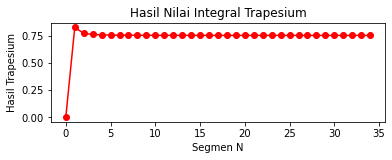

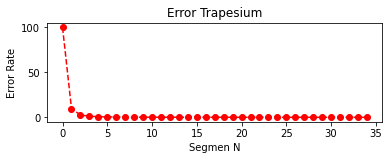

In [17]:
import numpy as np
import scipy.integrate as integral
import matplotlib.pyplot as plt

fx = lambda x : 1/(1 + x)

a = float(input("Input the a number : "))
b = float(input("Input the b number : "))
error = float(input("Input the error rate you want : "))

# Test terlebih dahulu dengan integral biasa dengan method scipy.quad
cobatestintegral,error_scipy = integral.quad(fx, a , b)
print("Jika ditest dengan Integral eksak : " , cobatestintegral)

n = 0
error_rate = 100

segmen_N_trape = [n]
error_N_trape = [error_rate]
hasil_Int_trape = [0]

while error_N_trape[len(error_N_trape) - 1] > error: 

    Trapezoidal = trapesium(fx,a,b,n) # Dipanggil fungsi algoritma trapesium

    error_rate = abs((cobatestintegral - Trapezoidal)/cobatestintegral) * 100
    # print(error_rate)
    n = n + 1
    
    masukan_kelist(segmen_N_trape , error_N_trape , hasil_Int_trape , n , error_rate , Trapezoidal)
    
print("Hasil Integral Trapesium = ", hasil_Int_trape[len(segmen_N_trape) - 1], "dengan Segmen N : " , 
      segmen_N_trape[len(segmen_N_trape) - 1])

# Plotting untuk Integral Trapesium (Khusus Trapesium)
plt.subplot(2,1,1)
Hasil_segmen = plt.plot(segmen_N_trape, hasil_Int_trape , color = "red" , marker = "o")
plt.title("Hasil Nilai Integral Trapesium")
plt.xlabel("Segmen N")
plt.ylabel("Hasil Trapesium")
plt.show()

plt.subplot(2,1,2)
Hasil_error = plt.plot(segmen_N_trape, error_N_trape , "g--d" ,color = "red" , marker = "o")
plt.title("Error Trapesium")
plt.xlabel("Segmen N")
plt.ylabel("Error Rate")
plt.show()

## Source Code dan grafik Integral Simpson 1/3 

Input the a number : 0
Input the b number : 1.125
Input the error rate you want : 0.01
Jika ditest dengan Integral eksak :  0.7537718023763801
Hasil metode Simpson 1/3 :  0.7538080008975345 dengan segmen N :  6


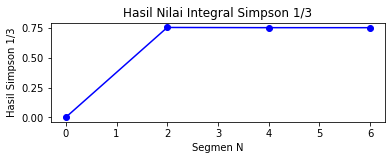

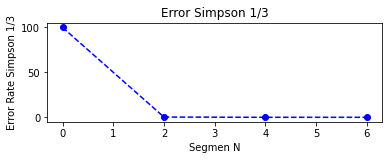

In [18]:
import numpy as np
import scipy.integrate as integral
import matplotlib.pyplot as plt

fx = lambda x : 1/(1 + x)

a = float(input("Input the a number : "))
b = float(input("Input the b number : "))
error = float(input("Input the error rate you want : "))

# Jika ditest dengan integral sebenarnya dengan method scipy.quad
cobatestintegral,error_scipy = integral.quad(fx, a , b)
print("Jika ditest dengan Integral eksak : " , cobatestintegral)


n = 0
error_rate = 100

segmen_N_simpson_sepertiga = [n]
error_N_simpson_sepertiga = [error_rate]
hasil_integrate_simpson_sepertiga = [0]

while error_N_simpson_sepertiga[len(error_N_simpson_sepertiga) - 1] > error:
    
    if n % 2 != 0: # Karena python looping nya dimulai dari 0 dan menambahkan n nya di bawah conditional
        
        simpson_sepertiga = simpson_satupertiga(fx,a,b,n) # Dipanggil fungsi algoritma Simpson 1/3
        
        error_rate = abs((cobatestintegral - simpson_sepertiga)/cobatestintegral) * 100
        #print(error_rate)
        n = n + 1
        
        masukan_kelist(segmen_N_simpson_sepertiga, error_N_simpson_sepertiga , hasil_integrate_simpson_sepertiga , n , 
                       error_rate , simpson_sepertiga)
        
    else:
        n = n + 1

print("Hasil metode Simpson 1/3 : " , hasil_integrate_simpson_sepertiga[len(segmen_N_simpson_sepertiga) - 1] , 
      "dengan segmen N : " , segmen_N_simpson_sepertiga[len(segmen_N_simpson_sepertiga) - 1])

# Plotting hasil Integral Simpson 1/3 ( Khusus Simpson 1/3 saja )
plt.subplot(2,1,1)
Hasil_segmen = plt.plot(segmen_N_simpson_sepertiga, hasil_integrate_simpson_sepertiga , color = "blue" , marker = "o")
plt.title("Hasil Nilai Integral Simpson 1/3")
plt.xlabel("Segmen N")
plt.ylabel("Hasil Simpson 1/3")
plt.show()

plt.subplot(2,1,2)
Hasil_error = plt.plot(segmen_N_simpson_sepertiga , error_N_simpson_sepertiga , "g--d" , color = "blue" , marker = "o")
plt.title("Error Simpson 1/3")
plt.xlabel("Segmen N")
plt.ylabel("Error Rate Simpson 1/3")
plt.show()

## Hasil Gabungan Plotting untuk Perbandingan Grafiknya

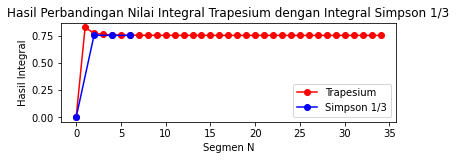

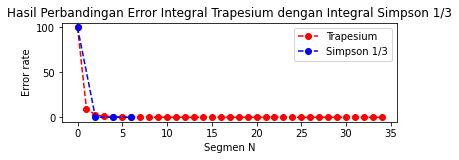

In [19]:
# Plotting gabungan perbandingan hasil Integral dan error nya
plt.subplot(2,1,1)
Hasil_segmen_trape =  plt.plot(segmen_N_trape, hasil_Int_trape , color = "red" , marker = "o" , label = "Trapesium")
Hasil_segmen_simpson = plt.plot(segmen_N_simpson_sepertiga, hasil_integrate_simpson_sepertiga , color = "blue" , 
                                marker = "o" , label = "Simpson 1/3")
plt.title("Hasil Perbandingan Nilai Integral Trapesium dengan Integral Simpson 1/3")
plt.xlabel("Segmen N")
plt.ylabel("Hasil Integral")
plt.legend()
plt.show()

plt.subplot(2,1,2)
Hasil_error_trape = plt.plot(segmen_N_trape, error_N_trape , "g--d" , color = "red" , marker = "o" , label = "Trapesium")
Hasil_error_simpson = plt.plot(segmen_N_simpson_sepertiga , error_N_simpson_sepertiga , "g--d" , color = "blue" , 
                               marker = "o" , label = "Simpson 1/3")
plt.title("Hasil Perbandingan Error Integral Trapesium dengan Integral Simpson 1/3")
plt.xlabel("Segmen N")
plt.ylabel("Error rate")
plt.legend()
plt.show()